In [43]:
import pandas as pd
import numpy as np

In [58]:
#Last Trading Day
# Trading will cease at the close of business two UK Business Days prior to
# the first calendar day of the delivery month, quarter, season, or calendar.

ice_ttf= pd.read_excel('curves/data/ICE_TTF_FUT.xlsx')  
ice_ttf.columns = ["tradedate"] + [f'M{i:02}' for i in range(1, 61)]
ice_ttf['tradedate'] = pd.to_datetime(ice_ttf['tradedate'])
ice_ttf.iloc[0:4,:]

,tradedate,M01,M02,M03,M04,M05,M06,M07,M08,M09,...,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60
0,2013-01-21,26.04,25.99,25.77,25.58,25.38,25.24,25.55,25.55,27.12,...,25.39,25.39,25.39,25.39,25.39,25.39,25.39,25.39,25.39,25.13
1,2013-01-22,26.34,26.18,25.93,25.78,25.61,25.37,25.91,25.91,27.28,...,25.47,25.47,25.47,25.47,25.47,25.47,25.47,25.47,25.47,25.20
2,2013-01-23,26.33,26.15,26.01,25.78,25.65,25.61,25.58,25.58,27.33,...,25.61,25.61,25.61,25.61,25.61,25.61,25.61,25.61,25.61,25.40
3,2013-01-24,25.85,25.81,25.71,25.54,25.41,25.33,25.38,25.69,26.13,...,23.92,23.35,23.38,23.83,24.38,25.05,26.20,27.03,27.23,27.32


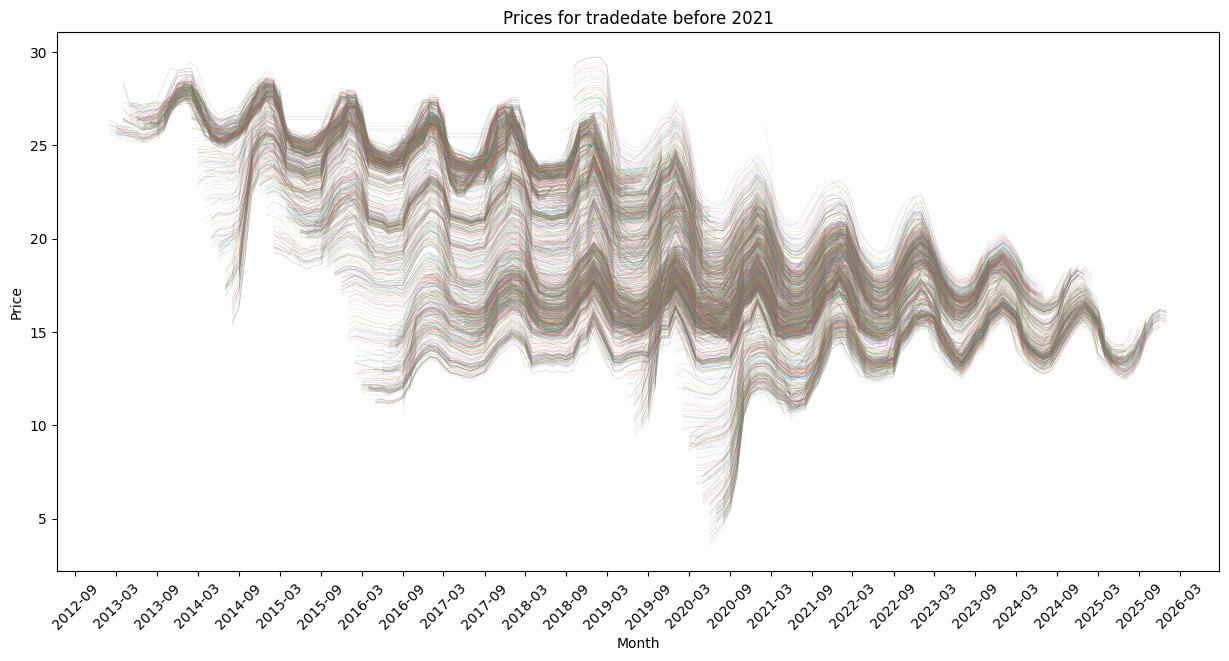

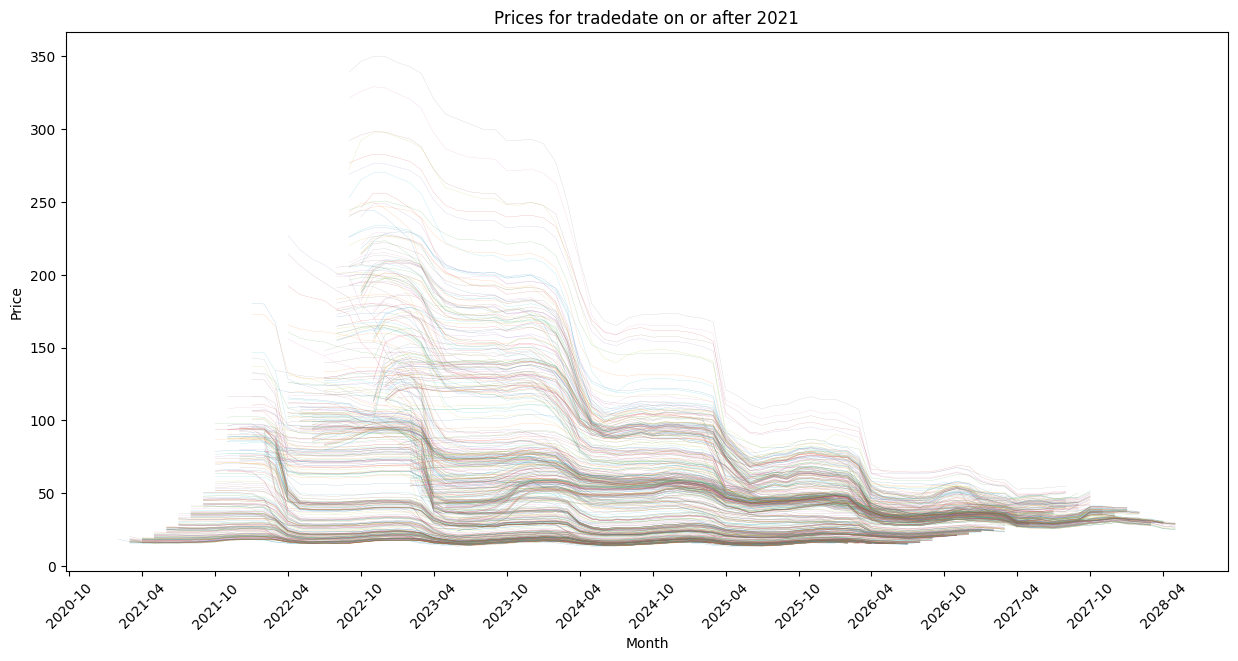

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the plotting function
def plot_curves(data, title_suffix):
    plt.figure(figsize=(15, 7))
    for index, row in data.iterrows():
        date_range = pd.date_range(start=row['tradedate'], periods=60, freq='MS')
        plt.plot(date_range, row['M01':'M60'], lw = 0.08)
    plt.title(f'Prices for tradedate {title_suffix}')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.xticks(rotation=45)
    plt.show()

# Split the data based on the condition
before_2021 = ice_ttf[ice_ttf['tradedate'] < pd.Timestamp('2021-01-31')]
after_2021 = ice_ttf[ice_ttf['tradedate'] >= pd.Timestamp('2021-02-01')]

# Call the plotting function for each subset
plot_curves(before_2021, 'before 2021')
plot_curves(after_2021, 'on or after 2021')

In [95]:

# Calculate log returns for each month column while preserving 'tradedate'
ice_ttf_log_returns = np.log(ice_ttf.iloc[:, 1:] / ice_ttf.iloc[:, 1:].shift(1))

# Insert the 'tradedate' column from the original DataFrame into the log returns DataFrame as the first column
ice_ttf_log_returns.insert(0, 'tradedate', ice_ttf['tradedate'])
ice_ttf_log_returns.dropna(inplace=True)
ice_ttf_log_returns



,tradedate,M01,M02,M03,M04,M05,M06,M07,M08,M09,...,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60
1,2013-01-22,0.011455,0.007284,0.006190,0.007788,0.009021,0.005137,0.013992,0.013992,0.005882,...,0.003146,0.003146,0.003146,0.003146,0.003146,0.003146,0.003146,0.003146,0.003146,0.002782
2,2013-01-23,-0.000380,-0.001147,0.003080,0.000000,0.001561,0.009416,-0.012818,-0.012818,0.001831,...,0.005482,0.005482,0.005482,0.005482,0.005482,0.005482,0.005482,0.005482,0.005482,0.007905
3,2013-01-24,-0.018398,-0.013087,-0.011601,-0.009353,-0.009401,-0.010993,-0.007849,0.004291,-0.044901,...,-0.068268,-0.092386,-0.091102,-0.072038,-0.049220,-0.022109,0.022777,0.053964,0.061336,0.072870
4,2013-01-25,0.009625,0.008103,0.001555,0.002737,0.003928,-0.000790,0.001181,0.000778,-0.003066,...,-0.005029,-0.005152,-0.005146,-0.005048,-0.004934,-0.004802,-0.004591,-0.004449,-0.004417,-0.007348
5,2013-01-28,-0.002301,-0.001923,-0.000388,-0.000781,0.000000,0.000395,0.000787,0.000389,-0.002306,...,0.001260,0.001291,0.001289,0.001264,0.001236,0.001203,0.001150,0.001114,0.001106,0.002210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,2023-05-24,-0.047169,-0.047110,-0.032810,-0.020634,-0.016720,-0.009493,-0.008757,-0.008163,-0.009891,...,-0.016958,-0.016371,-0.016128,-0.015752,-0.015308,-0.015971,-0.016384,-0.016746,-0.024235,-0.024799
2671,2023-05-25,-0.087702,-0.088731,-0.074982,-0.075208,-0.078133,-0.080999,-0.080573,-0.079605,-0.077312,...,-0.039569,-0.038452,-0.038759,-0.037831,-0.036658,-0.037014,-0.038000,-0.038861,-0.041849,-0.042857
2672,2023-05-26,-0.037305,-0.036214,-0.048042,-0.047027,-0.045323,-0.061072,-0.057437,-0.055186,-0.054577,...,-0.005885,-0.005746,0.000357,0.000349,0.000338,0.001533,0.001575,0.001611,0.010180,0.010429
2673,2023-05-29,0.001711,-0.001800,-0.000980,0.000998,-0.003688,-0.004705,-0.006520,-0.006383,-0.006395,...,-0.004019,-0.003874,-0.000893,-0.000872,-0.000844,-0.000851,-0.000874,-0.000895,-0.000974,-0.000998


<Axes: >

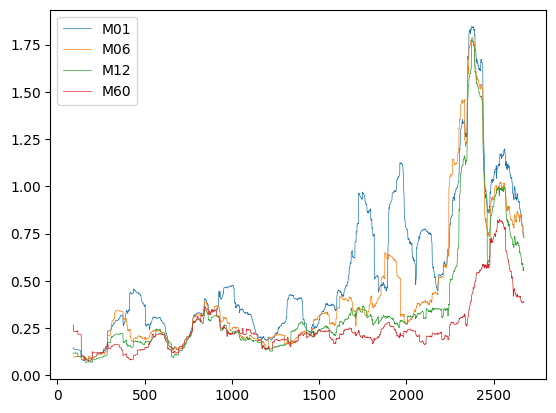

In [126]:
from matplotlib import legend
import pandas as pd
import numpy as np


# Assuming 'ice_ttf_log_returns' is your DataFrame with log returns and 'tradedate' as the first column
# Define the window size for the rolling calculation
window_size = 90  # 90 days for the rolling window
dt = 1/252
# Calculate the rolling standard deviations for each month column, excluding 'tradedate'
rolling_std = ice_ttf_log_returns.iloc[:, 1:].rolling(window=window_size).std()*np.sqrt(1/dt)

# Insert the 'tradedate' column from the log returns DataFrame into the rolling std DataFrame as the first column
rolling_std.insert(0, 'tradedate', ice_ttf_log_returns['tradedate'])

#rolling_std.iloc[:,1:].plot(legend = False, lw=0.1)
rolling_std[['M01', 'M06', 'M12', 'M60']].plot(lw = 0.5)

# The resulting 'rolling_std' DataFrame contains the rolling 90-day standard deviations for each month column with 'tradedate' as the first column

<Axes: >

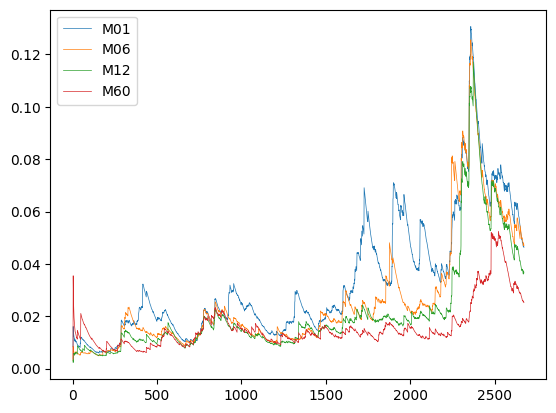

In [127]:
span = 90  # Example span value

# Calculate the EWMA standard deviations for each month column, excluding 'tradedate'
ewma_std = ice_ttf_log_returns.iloc[:, 1:].ewm(span=span, adjust=False).std()
ewma_std.insert(0, 'tradedate', ice_ttf_log_returns['tradedate'])

ewma_std[['M01', 'M06', 'M12', 'M60']].plot(lw = 0.5)